In [481]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
import matplotlib
%matplotlib inline
from collections import Counter

```
age: continuous. 
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
fnlwgt: continuous. 
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
education-num: continuous. 
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
sex: Female, Male. 
capital-gain: continuous. 
capital-loss: continuous. 
hours-per-week: continuous. 
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

```

In [482]:
df = pd.read_csv('./adult.data', header=None)
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
'native-country', 'salary']

In [483]:
print df['salary'].value_counts()
print len(df)
df[:5]

 <=50K    24720
 >50K      7841
dtype: int64
32561


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [484]:
DATA_TO_USE, _ = train_test_split(df, train_size=0.7, random_state=42)

In [485]:
categorical_vars = ['workclass', 'marital-status'
                    , 'occupation', 'relationship', 'race'
                    , 'sex', 'native-country']

In [486]:
import sklearn.preprocessing as preprocessing
import numpy as np

encoded_df = pd.DataFrame()
label_encs = {}
one_hot_enc = preprocessing.OneHotEncoder()
IGNORE_VARS = ['salary', 'fnlwgt', 'education']
continuous_vars = [x for x in df.columns if x not in categorical_vars and x not in IGNORE_VARS]
for col in df.columns:
    label_enc = preprocessing.LabelEncoder()
    if col not in categorical_vars:
        encoded_df[col] = df[col]
    else:
        encoded_df[col] = label_enc.fit_transform(df[col])
        label_encs[col] = label_enc
one_hot_encoded = one_hot_enc.fit_transform(encoded_df[categorical_vars])
features = np.concatenate([df[continuous_vars], one_hot_encoded.todense()], axis=1)
output = pd.Series(label_enc.fit_transform(df['salary']))

GET THE FEATURE NAMES

In [487]:
categorical_features_names = []
for i, feature_name in enumerate(categorical_vars):
    start = one_hot_enc.feature_indices_[i]
    end = one_hot_enc.feature_indices_[i+1]
    for j in range(start,end):
        feature_value = label_encs[feature_name].inverse_transform(j-start)
        feature =  feature_name + '-' + str(feature_value)
        categorical_features_names.append(feature)
feature_names = continuous_vars + categorical_features_names

In [488]:
cls = RandomForestClassifier(min_samples_leaf = 10, random_state=42, max_depth=20, n_estimators=40)

In [489]:
DATA_TO_USE, _, OUTPUT_TO_USE, _ = train_test_split(features, output, random_state=42, train_size=0.7)

In [490]:
TRAIN_FEATURES, TEST_FEATURES, TRAIN_OUTPUT, TEST_OUTPUT = train_test_split(DATA_TO_USE, OUTPUT_TO_USE, random_state=42, train_size=0.7)

array([ 0.88751455,  0.30231062,  0.53949769, ...,  0.03330087,
        0.34852168,  0.64683135])

In [721]:
cls.fit(TRAIN_FEATURES, TRAIN_OUTPUT)
predicted = cls.predict(TEST_FEATURES)
predicted_probs = cls.predict_proba(TEST_FEATURES).transpose()[1]
predicted = pd.Series(predicted, index=TEST_OUTPUT.index)
predicted.name = 'predicted'

In [492]:
from sklearn.metrics import precision_score, recall_score

In [493]:
print precision_score(TEST_OUTPUT, predicted)
print recall_score(TEST_OUTPUT, predicted)

0.794960903562
0.560318432333


In [540]:
misclassified_indices = TEST_OUTPUT[(TEST_OUTPUT != predicted)].index
misclassified_features = TEST_FEATURES[(b).values]
misclassified_features = np.array(misclassified_features)

In [495]:
misclassified_df = df.ix[misclassified_indices].join(predicted)

In [496]:
def distribution(variable):
    print "whole dataset"
    print df[variable].value_counts() * 100.0 / len(df[variable])
    print "\nmisclassified"
    print misclassified_df[variable].value_counts() * 100.0 / len(misclassified_df[variable])

In [497]:
import numba
def distribution(instance):
    preds = np.zeros(len(cls.estimators_))
    for i, est in enumerate(cls.estimators_):
        preds[i] = est.predict(instance)[0]
    return pd.Series(preds).value_counts()

In [498]:
cls.predict(misclassified_features[0])

array([0])

In [499]:
distribution(misclassified_features[0])

0    39
1     1
dtype: int64

In [500]:
dist = []
for instance in misclassified_features:
    try:
        a = distribution(instance).ix[0]
    except:
        a = 0
    dist.append(a)
dist = pd.Series(dist)

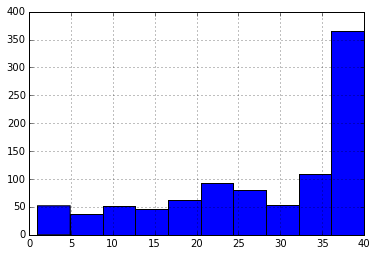

In [501]:
dist.hist()

In [502]:
cols = [x for x in df.columns if x != 'fnlwgt']

In [503]:
to_group = df
to_group['age'] = np.floor((to_group['age']/ 5)) * 5
counted = to_group.groupby(cols).size().reset_index()
counted[counted[0] > 2]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,0
12,15,?,10th,6,Never-married,?,Own-child,White,Female,0,0,20,United-States,<=50K,3
19,15,?,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K,5
20,15,?,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K,11
40,15,?,11th,7,Never-married,?,Own-child,White,Female,0,0,20,United-States,<=50K,3
42,15,?,11th,7,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,3
51,15,?,11th,7,Never-married,?,Own-child,White,Male,0,0,25,United-States,<=50K,4
55,15,?,11th,7,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K,5
98,15,?,HS-grad,9,Never-married,?,Own-child,White,Female,0,0,20,United-States,<=50K,3
110,15,?,HS-grad,9,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K,4
113,15,?,HS-grad,9,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K,3


In [504]:
cat = df[(df.age >= 30) & (df['hours-per-week'] >= 40) & (df.occupation == ' Exec-managerial') & (df.education == ' HS-grad') & (df.workclass == ' Private') & (df.relationship == ' Husband') & (df.race == ' White')]
print cat.salary.value_counts()
cat.sort('age', ascending=True)

 >50K     100
 <=50K     73
dtype: int64


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27589,30,Private,225053,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,<=50K
26368,30,Private,381153,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
26087,30,Private,167990,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,Ireland,<=50K
8814,30,Private,159255,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K
27447,30,Private,344200,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
4265,30,Private,34104,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,3103,0,55,United-States,>50K
7672,30,Private,99309,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,<=50K
4143,30,Private,223327,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
4095,30,Private,45604,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,54,United-States,<=50K
24792,30,Private,243165,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K


In [525]:
from collections import namedtuple
Node = namedtuple('Node', ['feature_id', 'feature_value', 'threshold', 'left', 'right', 'class_distribution', 'feature_name'])

class Tree(object):
    def __init__(self, decision_tree, feature_names):
        self.tree = decision_tree.tree_
        self.feature_names = feature_names
        self.threshold = self.tree.threshold
        self.children_right = self.tree.children_right
        self.children_left = self.tree.children_left
        self.feature_ids = self.tree.feature
        self.value = self.tree.value
    
    def print_path(self, features):
        self.print_path_from_node(0, features)

    def node(self, node_id, features):
        feature_id = self.feature_ids[node_id]
        return Node(
            feature_id=feature_id,
            feature_name=self.feature_names[feature_id],
            feature_value=features[feature_id],
            class_distribution=self.value[node_id],
            threshold=self.threshold[node_id],
            left=self.children_left[node_id],
            right=self.children_right[node_id]
        )
    
    def path_list(self, features):
        node_id = 0
        path = []
        while node_id != -1:
            node = self.node(node_id, features)
            if node.feature_value > node.threshold:
                path.append((node.feature_name, node.feature_value))
                node_id = node.right
            else:
                node_id = node.left
        #print node.class_distribution
        return path

    def predicted_node(self, features):
        node_id = 0
        while node_id != -1:
            prev_node_id = node_id
            node = self.node(node_id, features)
            if node.feature_value > node.threshold:
                node_id = node.right
            else:
                node_id = node.left
        return prev_node_id

    def print_path_from_node(self, node_id, features):
        node = self.node(node_id, features)
        if node.feature_value > node.threshold:
            #print "-> ",
            next_node = node.right
        else:
            #print "   ",
            next_node = node.left
        if next_node == -1:
            #print node.class_distribution
            return
        else:
            pass
            #print  node.feature_name, node.threshold, node.feature_value
        self.print_path_from_node(next_node, features)

# get features used

In [526]:
def get_features_used(features):
    features_used = []
    pred = cls.predict_proba(features)
    for est in cls.estimators_:
        t = Tree(est, feature_names)
        features_used += t.path_list(np.array(features)[0])
    return Counter(features_used), pred[0][1]

In [527]:
l = list()
for i in range(0, 500):
    counts, pred = get_features_used(misclassified_features[i])
    counts['prediction'] = pred
    l.append(counts)
uses_df = pd.DataFrame(l)

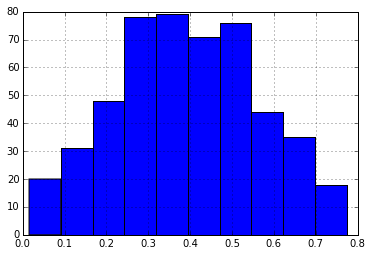

In [528]:
uses_df.prediction.hist()

In [529]:
pos_preds = uses_df[uses_df.prediction < 0.2].dropna(axis=1, how='all')

In [530]:
cols = pos_preds.count(axis=0)
cols = cols.sort(inplace=0, ascending=False)
cols[:10] * 100.0 / len(pos_preds)

prediction                              100.000000
(native-country- Vietnam, 0.0)          100.000000
(race- White, 1.0)                       83.098592
(native-country- United-States, 1.0)     80.281690
(workclass- Private, 1.0)                74.647887
(sex- Male, 1.0)                         64.788732
(relationship- Not-in-family, 1.0)       49.295775
(hours-per-week, 40.0)                   47.887324
(marital-status- Never-married, 1.0)     36.619718
(sex- Female, 1.0)                       35.211268
dtype: float64

In [531]:
pos_preds[cols[cols > 5].index][:10]

,prediction,"(native-country- Vietnam, 0.0)","(race- White, 1.0)","(native-country- United-States, 1.0)","(workclass- Private, 1.0)","(sex- Male, 1.0)","(relationship- Not-in-family, 1.0)","(hours-per-week, 40.0)","(marital-status- Never-married, 1.0)","(sex- Female, 1.0)",...,"(occupation- Craft-repair, 1.0)","(hours-per-week, 50.0)","(occupation- Sales, 1.0)","(education-num, 11.0)","(occupation- Adm-clerical, 1.0)","(workclass- Self-emp-not-inc, 1.0)","(relationship- Own-child, 1.0)","(race- Asian-Pac-Islander, 1.0)","(age, 30.0)","(occupation- Exec-managerial, 1.0)"
6,0.049730,40,11,6,10,16,19,7,16,NaN,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,0.181992,40,9,9,NaN,8,NaN,9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,0.171327,40,6,6,8,9,20,NaN,14,NaN,...,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
39,0.175828,40,NaN,NaN,5,12,15,3,14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
45,0.095350,40,8,3,12,NaN,14,NaN,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
46,0.066383,40,NaN,3,NaN,9,NaN,NaN,18,NaN,...,NaN,24,7,NaN,NaN,8,NaN,NaN,NaN,NaN
47,0.188827,40,5,NaN,NaN,NaN,NaN,2,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,0.049948,40,10,6,13,NaN,14,7,NaN,9,...,NaN,NaN,12,14,NaN,NaN,NaN,NaN,7,NaN
77,0.092130,40,3,7,NaN,12,18,NaN,18,NaN,...,10,22,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN
79,0.084870,40,11,2,NaN,17,11,6,NaN,NaN,...,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN


# predict node ids

In [541]:
def get_node_ids(features):
    node_ids = []
    for est in cls.estimators_:
        t = Tree(est, feature_names)
        node_ids.append(t.predicted_node(features))
    return node_ids

In [823]:
my_test_features = np.array(TEST_FEATURES)
node_ids = pd.DataFrame((get_node_ids(features) for features in my_test_features))

In [824]:
distances = pd.DataFrame(index=node_ids.index)
for i in node_ids.index:
    distances[i] = (node_ids != node_ids.ix[i]).astype(int).sum(axis=1)

In [822]:
len(distances)

1000

In [859]:
def smush_cliques(cliques, ids):
    ids = set(ids)
    disjoint_cliques = [ids]
    for c in cliques:
        if c.intersection(ids):
            ids.update(c)
        else:
            disjoint_cliques.append(c)
    return disjoint_cliques
cliques = list()
for i in distances.columns:
    near_ids = set(distances[i][distances[i] < 10].index)
    cliques = smush_cliques(cliques, near_ids)
cliques = list(reversed(sorted(cliques, key=len)))

In [894]:
def similarity_df(clique_id):
    indices = list(cliques[clique_id])
    return similarity_df_indices(indices)
def similarity_df_indices(indices):
    similar_df = pd.DataFrame(my_test_features[indices], columns=feature_names, index=indices)
    similar_df['pred'] = np.array(predicted)[similar_df.index]
    similar_df['pred_prob'] = np.array(predicted_probs)[similar_df.index]
    similar_df['actual'] = np.array(TEST_OUTPUT)[similar_df.index]
    return similar_df
def filtered_similarity_df_indices(indices):    
    similar_df = similarity_df_indices(indices)
    nontrivial_columns = similar_df.columns[(similar_df != 0).any()]
    similar_df = similar_df[nontrivial_columns]
    similar_df['pred'] = np.array(predicted)[similar_df.index]
    similar_df['pred_prob'] = np.array(predicted_probs)[similar_df.index]
    similar_df['actual'] = np.array(TEST_OUTPUT)[similar_df.index]
    return similar_df
def filtered_similarity_df(clique_id):
    indices = list(cliques[clique_id])
    return filtered_similarity_df_indices(indices)
#similarity_df(1)

In [861]:
def get_prediction_accuracy(clique_index):
    df = similarity_df(clique_index)
    pct_wrong = np.count_nonzero(df.actual != df.pred) * 100.0 / len(df)
    pct_rich = np.sum(df.pred) * 100.0 / len(df)
    pct_exec = np.count_nonzero(df['occupation- Exec-managerial'] == 1) * 100.0 / len(df)
    pct_sales = np.count_nonzero(df['occupation- Sales'] == 1) * 100.0 / len(df)
    return pct_wrong, len(df), pct_rich, pct_exec, pct_sales

In [862]:
accuracy_df = pd.DataFrame((get_prediction_accuracy(i) for i in range(len(cliques[:100]))), 
                           columns=['pct_wrong', 'size', 'pct_rich', 'pct_exec', 'pct_sales'])

In [887]:
s = pd.Series(np.array(predicted) != np.array(TEST_OUTPUT))
misclassified_df = pd.DataFrame(s, columns=['misclassified'])
clique_indices = pd.Series(index=misclassified_df.index)
for i, clique in enumerate(cliques):
    for member in clique:
        clique_indices[member] = i
misclassified_df['clique'] = clique_indices

In [898]:
misclassified_df[misclassified_df.misclassified]

,misclassified,clique
1,True,137
3,True,730
4,True,24
7,True,731
8,True,4
9,True,0
13,True,27
14,True,733
15,True,98
16,True,55


In [904]:
i = 6751
filtered_similarity_df_indices(list(distances[i][distances[i] < 30].index))

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass- ?,workclass- Private,workclass- Self-emp-not-inc,workclass- State-gov,marital-status- Married-civ-spouse,...,race- White,sex- Female,sex- Male,native-country- Dominican-Republic,native-country- England,native-country- South,native-country- United-States,pred,pred_prob,actual
496,31,13,0,1902,40,0,0,1,0,1,...,1,1,0,0,0,0,1,1,0.677906,1
595,37,13,0,0,37,0,1,0,0,1,...,1,1,0,0,0,0,1,1,0.597780,1
718,33,13,0,0,40,0,1,0,0,1,...,1,0,1,0,0,0,1,1,0.660854,1
1674,27,13,0,0,45,0,1,0,0,1,...,0,1,0,0,0,0,1,1,0.526672,1
1756,33,13,0,0,40,0,1,0,0,1,...,1,0,1,0,0,0,1,1,0.660854,1
1817,26,13,0,0,40,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0.469448,1
2028,57,13,0,0,40,0,1,0,0,1,...,1,1,0,0,0,0,1,1,0.599278,0
2167,27,10,0,0,40,0,1,0,0,1,...,1,1,0,0,0,0,1,0,0.433253,1
2220,30,13,0,0,50,0,1,0,0,1,...,1,0,1,0,0,0,1,1,0.626121,1
2481,27,13,0,0,40,0,1,0,0,1,...,1,0,1,1,0,0,0,1,0.500186,0


In [863]:
accuracy_df[:20]

,pct_wrong,size,pct_rich,pct_exec,pct_sales
0,33.568905,283,0.000000,0,0.000000
1,0.523560,191,0.000000,0,15.706806
2,0.000000,153,0.000000,0,45.098039
3,0.000000,100,0.000000,0,0.000000
4,24.444444,90,97.777778,0,0.000000
5,15.714286,70,0.000000,0,0.000000
6,0.000000,69,0.000000,0,0.000000
7,30.882353,68,7.352941,0,100.000000
8,12.068966,58,100.000000,100,0.000000
9,43.181818,44,54.545455,100,0.000000


In [864]:
filtered_similarity_df(0)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass- Private,marital-status- Married-civ-spouse,occupation- Craft-repair,relationship- Husband,race- White,sex- Male,native-country- Mexico,native-country- United-States,pred_prob,actual,pred
6146,28,9,0,0,50,1,1,1,1,1,1,0,1,0.256721,0,0
9,49,9,0,0,40,1,1,1,1,1,1,0,1,0.351920,1,0
4108,42,9,0,0,50,1,1,1,1,1,1,0,1,0.400345,1,0
1037,41,9,0,0,40,1,1,1,1,1,1,0,1,0.322436,1,0
1197,26,10,2829,0,40,1,1,1,1,1,1,0,1,0.219756,0,0
1044,30,9,0,0,40,1,1,1,1,1,1,0,1,0.189404,1,0
2072,53,10,0,0,36,1,1,1,1,1,1,0,1,0.302259,1,0
31,54,9,0,0,40,1,1,1,1,1,1,0,1,0.351920,1,0
1058,27,9,0,0,45,1,1,1,1,1,1,0,1,0.235523,1,0
3111,46,10,3103,0,60,1,1,1,1,1,1,0,1,0.400234,1,0


In [850]:
accuracy_df[accuracy_df.pct_wrong > 20].sort('pct_wrong', ascending=False)

,pct_wrong,size,pct_rich,pct_exec,pct_sales
37,100.000000,4,0.000000,0.000000,0.000000
23,77.777778,9,0.000000,100.000000,0.000000
33,50.000000,4,0.000000,0.000000,0.000000
39,50.000000,4,100.000000,0.000000,0.000000
17,34.782609,23,13.043478,0.000000,0.000000
28,33.333333,6,83.333333,0.000000,0.000000
3,30.739300,257,82.101167,0.000000,0.000000
4,30.454545,220,12.727273,17.272727,9.545455
2,27.415144,383,78.590078,100.000000,0.000000
1,25.670945,1714,12.660443,0.000000,18.203034


In [815]:
filtered_similarity_df(0).describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass- Federal-gov,workclass- Local-gov,workclass- Private,workclass- Self-emp-inc,workclass- Self-emp-not-inc,...,native-country- Canada,native-country- Ecuador,native-country- Germany,native-country- Jamaica,native-country- Mexico,native-country- United-States,native-country- Vietnam,pred,pred_prob,actual
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,...,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,42.765766,9.639640,217.518018,68.432432,43.972973,0.013514,0.040541,0.779279,0.040541,0.112613,...,0.004505,0.004505,0.004505,0.009009,0.004505,0.963964,0.004505,0.121622,0.336892,0.306306
std,11.906844,2.057072,857.793886,334.145621,11.000172,0.115720,0.197669,0.415670,0.197669,0.316833,...,0.067116,0.067116,0.067116,0.094701,0.067116,0.186801,0.067116,0.327587,0.122331,0.462000
min,21.000000,2.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.134539,0.000000
25%,33.000000,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.238942,0.000000
50%,42.000000,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.319196,0.000000
75%,53.000000,10.000000,0.000000,0.000000,50.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.407099,1.000000
max,79.000000,14.000000,5013.000000,1887.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.629803,1.000000


In [751]:
accuracy_df

,pct_wrong,size,pct_rich
0,3.233256,433,0.692841
1,27.821522,381,35.170604
2,29.538462,325,22.769231
3,12.500000,112,6.250000
4,3.092784,97,0.000000
5,35.869565,92,40.217391
6,0.000000,86,0.000000
7,25.925926,54,81.481481
8,0.000000,42,0.000000
9,7.894737,38,0.000000


In [695]:
get_prediction_accuracy(1)

/home/bork/.conda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0